In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#IMPORTMOS EL DATASET
tp = pd.read_csv(r'Ecommerce ABI Enriched.csv', delimiter=',', low_memory= 'false')

C:\Users\Usuario\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21,29,47,62,68,74,82,84,91,103,104,112,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#CHEQUEAMOS CUANTAS FILAS Y COLUMNAS TIENE
tp.head(30)
tp.shape

(359388, 141)

In [4]:
#DETALLE DE COLUMNAS
tp.columns

Index(['age', 'birth_date', 'birth_date_day', 'birth_date_month',
       'birth_date_year', 'channel', 'city', 'complement', 'country',
       'created_in',
       ...
       'ideal_glass', 'fermentation', 'style', 'category', 'subcategory',
       'country_of_production', 'is_abi', 'source_schema', 'food_pairing_tip',
       'time.1'],
      dtype='object', length=141)

In [5]:
#Vemos que columnas tienen nulls
tp.isnull().sum()

age                            359388
birth_date                     359388
birth_date_day                 359388
birth_date_month               359388
birth_date_year                359388
channel                        359388
city                           359388
complement                     359388
country                             0
created_in                          0
creation_brand                      0
district                       359388
document_id                    359388
document_id_unify              359388
email                          359388
emails                         359388
facebook_id                    359388
first_name                     359388
full_name                      359388
gender                         359388
id                                  0
id_1                           133049
identification_number          359388
identification_number_unify    359388
is_employee                    359388
last_name                      359388
mobile_numbe

In [6]:
#Borramos todas las columnas que no sirven
tpf1 = tp.drop(['age','birth_date','birth_date_day','birth_date_month','birth_date_year','created_in','channel','city','complement','district','document_id','document_id_unify','email','emails','facebook_id','first_name','full_name','country_of_production',
       'food_pairing_tip','width','time', 'ideal_glass','table_origin','td_id', 'fermentation','origin_score',
       'style','ideal_temperature', 'local_subcategory', 'is_bundle', 'volume','source_system',
       'abv', 'units_per_sku','length','creation_brand', 'country_of_origin','height','business_name',
       'is_active','identification_number','source','title','td_id','system','currency',
       'identification_number_unify', 'is_employee','last_name','product_spk','business_spk',
       'mobile_number','neighborhood','number','phone_number','state','street','td_global_id',
       'time_creation', 'twitter_id','department','item_id', 'uniqueid', 'zipcode', 'cuit_cuil',
       'dni', 'id_2', 'id_3','gender', 'id_1','unit_discount_local','td_id.1','customer_first_order_period','customer_first_order_year',
       'unit_delivery_cost_local', 'is_incomplete', 'coupon_code','unit_tax_usd','unit_tax_local',
       'order_rating','unit_subtotal_charged_usd','delivery_type',
       'unit_subtotal_charged_local', 'unit_delivery_cost_usd', 'order_type',
       'unit_product_cost_local','unit_margin_usd','product_url','is_test','unit_product_cost_usd',
       'unit_margin_local', 'unit_volume','description', 'body', 'local_category', 'date_retired',
       'is_returnable_glass_bottle', 'ean', 'row_updated_at', 'brand_category','elegible_discount_spk','delivery_address_spk','discount_name','operator_nk','discount_spk','image_url','upc','opt_in','id_4','weight','source_schema','is_abi','time.1','product_nk'], axis = 1)

In [8]:
#Vemos cuantas filas y columnas quedaron
tpf1.shape

(359388, 28)

In [9]:
#Vemos cuantos registros tienen nulls
tpf1.isnull().sum()

country                            0
id                                 0
unit_discount_usd                  0
customer_first_order_date          0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
order_status_type                  0
customer_spk                       0
unit_price_charged_local           0
unit_gross_revenue_usd             0
source_system_order_id             0
unit_delivery_charged_local        0
rate_local_do_usd                  0
quantity                           0
unit_price_charged_usd             0
unit_net_revenue_local             0
order_days_after_first_order       0
order_time                         0
row_created_at                     0
sku                              616
brand                           2520
date_created                    2333
name                               0
category                        4954
s

In [10]:
#Separamos la columa order_date en año,mes y dia
tpf1.order_date = pd.to_datetime(tpf1.order_date)
tpf1['year'] = tpf1.order_date.dt.year 
tpf1['month'] = tpf1.order_date.dt.month 
tpf1['day'] = tpf1.order_date.dt.day 
tpf1.head()

,country,id,unit_discount_usd,customer_first_order_date,unit_gross_revenue_local,unit_delivery_charged_usd,unit_net_revenue_usd,order_date,order_status,order_status_type,...,row_created_at,sku,brand,date_created,name,category,subcategory,year,month,day
0,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.0000,2018-04-18,884.6936,0.1707,1.3421,2018-04-18,canceled,Invalid,...,2018-08-20 05:55:44.844529,69,Goose Island,2018-04-05 10:45:09.088888,Pack Degustación Goose Island + Vaso,unknown,unknown,2018,4,18
1,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.2652,2018-04-18,722.7899,0.1708,1.0965,2018-04-18,invoiced,Valid,...,2018-08-20 05:55:44.844529,69,Goose Island,2018-04-05 10:45:09.088888,Pack Degustación Goose Island + Vaso,unknown,unknown,2018,4,18
2,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.0000,2018-04-18,1129.6857,0.2179,1.7138,2018-04-18,canceled,Invalid,...,2018-06-08 05:39:56.779021,50,Lowenbrau,2018-04-05 10:45:36.799491,Cerveza Lowenbrau Oktoberfest Botella,Beer,unknown,2018,4,18
3,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.3382,2018-04-18,921.6156,0.2178,1.3981,2018-04-18,invoiced,Valid,...,2018-06-08 05:39:56.779021,50,Lowenbrau,2018-04-05 10:45:36.799491,Cerveza Lowenbrau Oktoberfest Botella,Beer,unknown,2018,4,18
4,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.0000,2018-04-18,1046.8875,0.2019,1.5882,2018-04-18,canceled,Invalid,...,2018-08-20 07:30:23.707858,449,unknown,2018-05-21 13:00:01.212182,Cerveza Lowenbrau Original Botella,unknown,unknown,2018,4,18


In [11]:
#Filtramos el dataset por country = Argentina
tp_arg = tpf1.loc[tpf1['country'].isin(['Argentina'])]
tp_arg.country.unique()

array(['Argentina'], dtype=object)

In [12]:
#Filtramos el dataset por el año 2017
tp_arg_2017 = tp_arg.loc[tp_arg['year'].isin(['2017'])]
tp_arg_2017.year.unique()

array([2017], dtype=int64)

In [13]:
#Borramos los registros vacios CATEGORY
tp_arg_2017 = tp_arg_2017.drop(tp_arg_2017.loc[tp_arg['subcategory'].isnull()].index)
tp_arg_2017.isnull().sum()

country                          0
id                               0
unit_discount_usd                0
customer_first_order_date        0
unit_gross_revenue_local         0
unit_delivery_charged_usd        0
unit_net_revenue_usd             0
order_date                       0
order_status                     0
order_status_type                0
customer_spk                     0
unit_price_charged_local         0
unit_gross_revenue_usd           0
source_system_order_id           0
unit_delivery_charged_local      0
rate_local_do_usd                0
quantity                         0
unit_price_charged_usd           0
unit_net_revenue_local           0
order_days_after_first_order     0
order_time                       0
row_created_at                   0
sku                             13
brand                            0
date_created                     0
name                             0
category                         0
subcategory                      0
year                

In [14]:
tp_arg_2017.brand.unique()

array(['Corona', 'Patagonia Brewing Co.', 'Peñón del Águila', 'BevyBar',
       'Stella Artois', 'Bass Brewery', 'Leffe', "Fuller's",
       'Spaten-Franziskaner-Bräu', 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0', 'Grupo Modelo', 'Barba Roja',
       'Coopers Brewery', 'Brouwerij Van Steenberge', 'Hoegaarden',
       'Backus y Johnston', 'Löwenbräu', 'Brauerei Beck & Co',
       'Fabricas Nacionales De Cerveza', 'Czechvar',
       'De La Vaca Tranquila Cervezas Artesanales',
       'Paulaner Brauerei München', 'Duvel Moortgat', 'Zillertal',
       'Baltika Breweries', 'Hofbräu München', 'Chimay',
       'Kronenbourg 1664', 'Kulmbacher Brauerei AG', 'Grimbergen',
       'Maredsous', 'Tsingtao', 'Cervecería y Maltería Quilmes',
       'Fábricas Nacionales De Cerveza', 'Anchor Brewing Company',
       'Cervecería Antares', 'Condeminal', 'Brasserie de Silly',
       'SAB Miller', 'Bodega Budeguer', 'Shock Top', 'Belsh',
       'OETTINGER Brauerei GmbH', 'Erdinger Weissbräu',

In [15]:
#Cambiamos Grupo Modelo por Corona
tp_arg_2017.brand = tp_arg_2017.brand.replace(to_replace = ['Grupo Modelo'],value = 'Corona')

In [16]:
#Cambio todos los brands de importadas por 'importadas'
tp_arg_2017.brand = tp_arg_2017.brand.replace(to_replace = ['Cervecería Antares','Flensburger Brauerei','Fábricas Nacionales De Cerveza', 'Fabricas Nacionales De Cerveza', 'Cerveceria Artesanal El Bolson', 'Peñón del Águila', 'Leffe', 'Spaten-Franziskaner-Bräu', 'BBC', 'Cervecería Artesanal El Bolson',
       'Anchor Brewing Company', 'Bass Brewery', 'Hofbräu München',
       'Adnams', "Fuller's", 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0',
       'Brouwerij Van Steenberge', 'Hoegaarden',
       'Fuegian Beverage Company',
       'De La Vaca Tranquila Cervezas Artesanales', 'Tsingtao',
       'Löwenbräu', 'unknown', 'Barba Roja', 'Coopers Brewery',
       'Backus y Johnston', 'Brauerei Beck & Co', 'MixxTail', 'Shock Top',
       'Bogotá Beer Company',
       'Czechvar', 'Belle-Vue', 'Paulaner Brauerei München',
       'Duvel Moortgat', 'Zillertal', 'Baltika Breweries', 'Chimay',
       'Kronenbourg 1664', 'Kulmbacher Brauerei AG', 'Grimbergen',
       'Maredsous',
       'franziskaner', 'Condeminal', 'Erdinger Weissbräu',
       'Brasserie de Silly', 'SAB Miller','Bodega Budeguer',
       'Skol', 'Belsh', 'OETTINGER Brauerei GmbH', 'Águila Real', 'Hertog Jan', 'Manos Negras', 'Freixenet',
       'The Fran-C Wines', 'Finca Ferrer', 'Bodega Renacer', 'Oranjeboom',
       'Maal Wines', 'Tinto Negro', 'Corbeau Wines',
       'Mosquita Muerta Wines', 'Bodega del Desierto', 'Antigua',
       'Boris Biere', 'Barceló', 'Boddingtons', 'Bombay', 'Jägermeister',
       'Revancha', 'Huentala Wines', 'Bodega Cruz Primero', 'Aura',
       'Harvierstoun', 'Chivas Regal', 'Weidmann', 'Isle of Jura', 'Belenkaya',
       '2km', "Jack Daniel's", 'Johnnie Walker', 'Whyte & Mackay',
       'The Patrón Spirits Company', 'Amarula', 'Havana Club',
       'Matías Riccitelli', 'Mulata', 'Rye', 'Mundo Revés', 'Brahma',
       'Bodega José Luis Mounier', 'José Cuervo', 'Jim Beam', 'Bier Life',
       'Makers Mark', 'Mistral', 'Príncipe de los Apóstoles',
       'Flor de Caña', 'Bacardi', 'Absolut', 'Pravda', 'Greene King',
       'SKYY', 'Hennessy', 'Noctua', 'Jameson', 'Traslapiedra',
       'Bodega Ojo de Vino', 'Tres14', 'Velho Barreiro', 'Van Pur',
       'SIAM', 'Beluga', 'Bottega', 'Campari', 'The Glenrothes',
       'Cinzano', 'Xoriguer', 'El Jimador', 'Kahlúa', 'Malibu', 'Aperol',
       'The Botanist', 'Brasserie de Luxemburgo Mousel - Diekrich',
       'The Famous Grouse', 'MG Destilerías', 'Grand Marnier',
       'Cointreau', 'Finca Beth', 'The Mula Cervezas Especiales',
       'Anima Mundi'],value = 'importada')

In [17]:
#Vemos los brands que quedaron
tp_arg_2017['brand'].unique()

array(['Corona', 'Patagonia Brewing Co.', 'importada', 'BevyBar',
       'Stella Artois', 'Cervecería y Maltería Quilmes'], dtype=object)

In [18]:
## Algunos comentarios: 
##   No hay info de 2019, termina en 18 Agosto 2018
##   id podriamos usarlo para saber cuanto gasta una persona en promedio en ecommerce, ver evolucion
##   Bevybar y Craft Society son cosas sin marca, habria que unirlas

cant_NaNf = tp_arg_2017.isnull().sum()
print(cant_NaNf,'\r\n')

country                          0
id                               0
unit_discount_usd                0
customer_first_order_date        0
unit_gross_revenue_local         0
unit_delivery_charged_usd        0
unit_net_revenue_usd             0
order_date                       0
order_status                     0
order_status_type                0
customer_spk                     0
unit_price_charged_local         0
unit_gross_revenue_usd           0
source_system_order_id           0
unit_delivery_charged_local      0
rate_local_do_usd                0
quantity                         0
unit_price_charged_usd           0
unit_net_revenue_local           0
order_days_after_first_order     0
order_time                       0
row_created_at                   0
sku                             13
brand                            0
date_created                     0
name                             0
category                         0
subcategory                      0
year                

In [19]:
##Tabla para ver cuantas veces compró cada usuario
compras_usuario = tp_arg_2017.groupby(['id'])['id'].count()
compras_usuario = compras_usuario.loc[compras_usuario < 10]
compras_usuario.describe

<bound method NDFrame.describe of id
["ar_bevybar;00005c5b185e25f9c7b9642ca76950fe43e4fcce6c02cbbf7a8768f2dd1ed395"]    3
["ar_bevybar;0004e1e6b290d864e2776edc0ddd5ad41eb651a793dfaaa8a0053d25bcc3b741"]    2
["ar_bevybar;0005c424ba71c03ac51d8a08844d281966d94b9cd2c5392c1d5b502c83c752ab"]    3
["ar_bevybar;00078c1eb18da02b9da6835c16bdf960a37fb1fa830f0a5c75145bcab5107721"]    4
["ar_bevybar;000a79e8f3fbccdb6ce37315cbbb5d2baeed8e38a1468ad67cfb43c74a79304c"]    1
["ar_bevybar;000e8d3fcdd026d84901038b522daa7dfbee79d49364e087dfc1f604bdded74a"]    3
["ar_bevybar;00165a04cac08882d8389a3ba4e42715a810db0824f4c807e852c57d9711ec2d"]    2
["ar_bevybar;0017ddf1d1f53ebfa4234926764df3610a82e8aacf8d3e62238f792cb7afcb20"]    1
["ar_bevybar;001967fb1a3b3ddd3e46fec548a5211d72147d9c67aa52cc160be253c601b6c6"]    1
["ar_bevybar;002133fa896e207bb223125b31801ad66edfbb84376ce16a9815c18abcf145c6"]    1
["ar_bevybar;0022d9d95d8e4ef52363b1aa4a8b1cad74eaf303020d5db20058b105a340d13c"]    1
["ar_bevybar;00264d15a2936e8

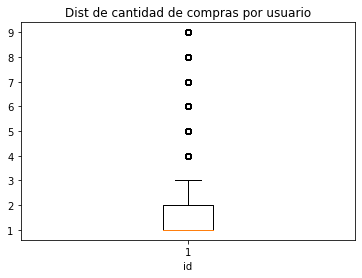

In [20]:
plt.boxplot(compras_usuario)
plt.title("Dist de cantidad de compras por usuario")
plt.xlabel("id")
plt.show()

In [21]:
#Vemos la cantidad de apariciones de estados de pagos
tp_arg_2017.order_status.value_counts()

paid                   59954
grand_total_is_zero     4997
refunded                 501
partially_refunded       477
pending                  421
partially_paid             2
Name: order_status, dtype: int64

In [22]:
#Dejamos el dataset sin grand_total_is_zero
tp_arg_2017 = tp_arg_2017.loc[tp_arg_2017['order_status'].isin(['paid', 'pending', 'refunded','partially_refunded','autorized','partially_paid'])]
tp_arg_2017.shape

(61355, 31)

In [23]:
tp_arg_2017.brand.value_counts()

importada                        22198
Stella Artois                    12867
Patagonia Brewing Co.             9881
BevyBar                           8725
Corona                            6952
Cervecería y Maltería Quilmes      732
Name: brand, dtype: int64

In [24]:
tp_arg_2017.category.value_counts()

Mixed Pack      31790
Beer            22080
Merchandise      6430
Wine              678
Spirits           205
unknown           128
Home Brewing       44
Name: category, dtype: int64

In [25]:
##Voy a buscar dejar un dataset solo con las marcas de cerveza, y con las importadas agrupadas
tp_arg_2017 = tp_arg_2017.loc[tp_arg_2017['category'].isin(['Mixed Pack', 'Beer', 'Merchandise','unknown'])]
tp_arg_2017.shape

(60428, 31)

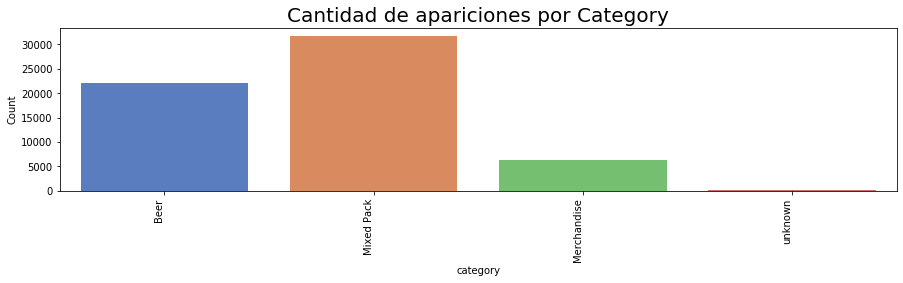

In [26]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="category",data= tp_arg_2017, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de apariciones por Category',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

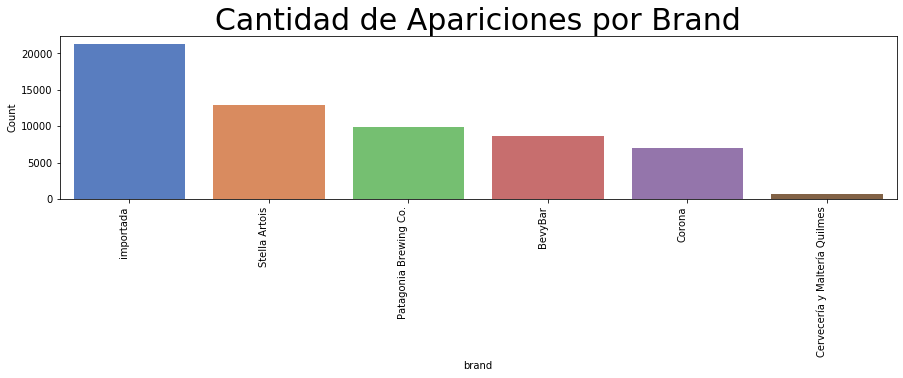

In [27]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data=tp_arg_2017, palette = "muted", order = tp_arg_2017['brand'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de Apariciones por Brand',size = 30)
plt.xlabel("brand")
plt.ylabel("Count")
plt.show()

In [28]:
##Ver si en alguna estacionalidad se vende mas el merchandising o alguna marca en particular
##Mostrar Cantidad de Ventas (Apariciones por brand) segun Beer, Merchandise y Mixed Pack
##Buscar si estan las columnas de lat y long y ver si podemos hacer un heatmap
##Separar fechas (por lo menos por mes) y analizar en que epoca se vende mas (verano?aguinaldo?)
##Todas las filas que tengan el order_status = grand_total_is_zero
##row_created_at
#order_status_type
#customer_spk

In [29]:
#Borramos mas columnas
tp_h = tp_arg_2017.drop(['unit_gross_revenue_usd', 'source_system_order_id', 'rate_local_do_usd', 'order_days_after_first_order', 'unit_price_charged_usd', 'unit_discount_usd', 'customer_first_order_date', 'unit_delivery_charged_usd', 'unit_net_revenue_usd', 'row_created_at', 'sku', 'date_created'], axis=1)
tp_h.shape

(60428, 19)

In [30]:
tp_h = tp_h.drop(tp_h.loc[tp_h['brand'].isnull()].index)
tp_h.isnull().sum()

country                        0
id                             0
unit_gross_revenue_local       0
order_date                     0
order_status                   0
order_status_type              0
customer_spk                   0
unit_price_charged_local       0
unit_delivery_charged_local    0
quantity                       0
unit_net_revenue_local         0
order_time                     0
brand                          0
name                           0
category                       0
subcategory                    0
year                           0
month                          0
day                            0
dtype: int64

In [31]:
#Ordeno por fecha para ver cuando es la primer compra y cuando la última
tp_h.sort_values('order_date')
#La primera se da en Febrero de 2016 y la última en Agosto de 2018. Tener esto en cuenta para cuando
#hagamos análisis de estacionalidad. Habría que ver cuando se da el primer registro de c/ marca.

,country,id,unit_gross_revenue_local,order_date,order_status,order_status_type,customer_spk,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,order_time,brand,name,category,subcategory,year,month,day
248374,Argentina,"[""ar_bevybar;9e81945b5bcef646e7903ce73965d32b0...",1160.0000,2017-01-01,paid,Valid,ar_bevybar;9e81945b5bcef646e7903ce73965d32b077...,510.0,140.0000,2,873.1320,23:29:33,Stella Artois,Copas Stella Artois 250ml - Pack 6 unidades,Mixed Pack,unknown,2017,1,1
356004,Argentina,"[""ar_bevybar;ac471f535d7439642ece126453ed5ab33...",780.0000,2017-01-01,paid,Valid,ar_bevybar;ac471f535d7439642ece126453ed5ab33ce...,780.0,0.0000,1,587.1060,22:06:21,importada,Cerveza Grimbergen Double Ambreé,Beer,unknown,2017,1,1
114861,Argentina,"[""ar_bevybar;05e4058c71191a40919d89367afcd4768...",732.0000,2017-01-01,paid,Valid,ar_bevybar;05e4058c71191a40919d89367afcd476838...,732.0,0.0000,1,550.9764,16:18:32,BevyBar,Pack Desde Bélgica,Mixed Pack,unknown,2017,1,1
354560,Argentina,"[""ar_bevybar;2fafe310067059488b1611913e6fa6722...",12240.0000,2017-01-01,paid,Valid,ar_bevybar;2fafe310067059488b1611913e6fa672227...,510.0,0.0000,24,9213.0480,19:50:55,Stella Artois,Copas Stella Artois 250ml - Pack 6 unidades,Mixed Pack,unknown,2017,1,1
356914,Argentina,"[""ar_bevybar;5c0be81484c24b7760da62ade562f05c5...",81.3669,2017-01-02,paid,Valid,ar_bevybar;5c0be81484c24b7760da62ade562f05c5d2...,65.0,16.3669,1,61.2449,14:02:39,Stella Artois,Destapador Stella Artois,Merchandise,Others,2017,1,2
229011,Argentina,"[""ar_bevybar;05226c87cb02d83ae255cf015e5691905...",625.0000,2017-01-02,paid,Valid,ar_bevybar;05226c87cb02d83ae255cf015e5691905e7...,510.0,115.0000,1,470.4375,19:21:02,Stella Artois,Copas Stella Artois 250ml - Pack 6 unidades,Mixed Pack,unknown,2017,1,2
358558,Argentina,"[""ar_bevybar;d105276dd4dd162e60dbef020606df96a...",1833.2685,2017-01-02,paid,Valid,ar_bevybar;d105276dd4dd162e60dbef020606df96a27...,900.0,33.2685,2,1379.9012,10:51:15,importada,Vaso Franziskaner 473ml - Pack 6 unidades,Mixed Pack,unknown,2017,1,2
311458,Argentina,"[""ar_bevybar;3819313c2dcbd01d6926d7fedc568ace8...",115.0000,2017-01-02,paid,Valid,ar_bevybar;3819313c2dcbd01d6926d7fedc568ace816...,510.0,115.0000,4,86.5605,09:31:08,Stella Artois,Copas Stella Artois 250ml - Pack 6 unidades,Mixed Pack,unknown,2017,1,2
314152,Argentina,"[""ar_bevybar;b0e38b916a69396b6ef7185091cbdfc65...",999.0000,2017-01-02,paid,Valid,ar_bevybar;b0e38b916a69396b6ef7185091cbdfc6569...,999.0,0.0000,1,751.9473,11:58:37,BevyBar,Pack Fellaini & Company,Mixed Pack,unknown,2017,1,2
358612,Argentina,"[""ar_bevybar;6f1de045a35cd4bfa45353ab1bcaa49a0...",630.0000,2017-01-02,paid,Valid,ar_bevybar;6f1de045a35cd4bfa45353ab1bcaa49a037...,630.0,0.0000,1,474.2010,19:39:29,importada,Pack de Cervezas y Vasos Hoegaarden,Mixed Pack,unknown,2017,1,2


In [32]:
#Me fijo las cantidades totales de categoría por todos los meses. Sería mejor ver año por año mas que la suma de todes
tp_pivot_cat = pd.pivot_table(data = tp_h, values = ['quantity'], index = ['month'], columns = ['category'], aggfunc= np.sum, )
tp_pivot_cat

quantity                               
category     Beer Merchandise Mixed Pack unknown
month                                           
1            4232         687       1351      15
2            2810        2549       2562       2
3            2850        1037       2477      18
4            4763         380       1976      31
5            2182         543       4821      22
6            9812         800       2557      12
7            4300         595       3153      82
8            1428         334        843       4
9            5135        1069       3391       4
10           3308         447       4305       1
11           2456         186       5714       2
12           6102         903       4719       2

In [33]:
#Idem anterior pero por marca
tp_pivot_brand = pd.pivot_table(data = tp_h, values = ['quantity'], index = ['month'], columns = ['brand'], aggfunc= np.sum, )
tp_pivot_brand

quantity                                                             \
brand  BevyBar Cervecería y Maltería Quilmes Corona Patagonia Brewing Co.   
month                                                                       
1          255                            57    539                   953   
2          241                            92    386                   665   
3          288                            30    480                   576   
4          465                            18    639                   650   
5         1876                            37    697                  1162   
6          802                            17    816                   729   
7          732                            80   1180                  1796   
8          126                            30    246                   561   
9          161                            88   1180                  2627   
10        1608                            61   1270                  1687   
11        1531                            75   1792                  1213   
12        1572                           300   1546                  1154   

                               
brand Stella Artois importada  
month                          
1              1252      3229  
2              4272      2267  
3              2611      2397  
4               968      4410  
5              1371      2425  
6              1640      9177  
7               972      3370  
8               496      1150  
9              1414      4129  
10              729      2706  
11             1797      1950  
12             1633      5521

In [34]:
#esta sería la pivot de las pivots, la idea es ver todo por mes para saber mejor la distribución
tp_pivot_two = pd.pivot_table(data = tp_h, values = ['quantity'], index = ['month'], columns = ['brand', 'category'], aggfunc= np.sum, )
tp_pivot_two
#budweiser tiene todo unknown, y patagonia solo se compró mixed pack por ej.

quantity                                                       \
brand     BevyBar                        Cervecería y Maltería Quilmes   
category     Beer Merchandise Mixed Pack                          Beer   
month                                                                    
1             NaN         NaN      255.0                          57.0   
2             NaN         2.0      239.0                          92.0   
3             1.0         2.0      285.0                          30.0   
4            19.0         4.0      442.0                          18.0   
5             9.0         5.0     1862.0                          14.0   
6            32.0         3.0      767.0                           3.0   
7            39.0        10.0      683.0                           3.0   
8             2.0         5.0      119.0                           8.0   
9             1.0        21.0      139.0                           NaN   
10           23.0         4.0     1581.0                           NaN   
11           14.0         8.0     1509.0                           1.0   
12            6.0         NaN     1566.0                         261.0   

                                                                       ...  \
brand                                   Corona                         ...   
category Merchandise Mixed Pack unknown   Beer Merchandise Mixed Pack  ...   
month                                                                  ...   
1                NaN        NaN     NaN  404.0       124.0       11.0  ...   
2                NaN        NaN     NaN  191.0       172.0       23.0  ...   
3                NaN        NaN     NaN  259.0        82.0      139.0  ...   
4                NaN        NaN     NaN  192.0        56.0      391.0  ...   
5                NaN       23.0     NaN  230.0       105.0      362.0  ...   
6                NaN       14.0     NaN  551.0       133.0      132.0  ...   
7               15.0       62.0     NaN  720.0       189.0      271.0  ...   
8                2.0       20.0     NaN  136.0        87.0       23.0  ...   
9               33.0       55.0     NaN  703.0       307.0      170.0  ...   
10              15.0       46.0     NaN  921.0       254.0       95.0  ...   
11              12.0       61.0     1.0  438.0        50.0     1304.0  ...   
12               8.0       30.0     1.0  209.0        54.0     1283.0  ...   

                                                                             \
brand    Patagonia Brewing Co.         Stella Artois                          
category            Mixed Pack unknown          Beer Merchandise Mixed Pack   
month                                                                         
1                        432.0     NaN         269.0       444.0      539.0   
2                        344.0     NaN         115.0      2306.0     1851.0   
3                        370.0     NaN          75.0       907.0     1616.0   
4                        329.0     NaN          56.0       288.0      620.0   
5                        896.0     NaN          70.0       403.0      889.0   
6                        431.0     NaN         121.0       639.0      876.0   
7                       1329.0    75.0         117.0       352.0      502.0   
8                        270.0     NaN          44.0       176.0      274.0   
9                       1716.0     NaN         211.0       429.0      774.0   
10                      1321.0     NaN         145.0       104.0      480.0   
11                       899.0     NaN         265.0        39.0     1493.0   
12                       603.0     NaN         409.0       288.0      936.0   

                                                           
brand            importada                                 
category unknown      Beer Merchandise Mixed Pack unknown  
month                                                      
1            NaN    3096.0         4.0      114.0    15.0  
2         

In [35]:
#Hago 3 datasets que agrupen por año, mes y día c/u, así podemos ver la variación, Quedaría mejor con barras
tp_by_year = tp_arg.groupby(['year']).sum()
tp_by_month = tp_h.groupby(['month']).sum() #tp_h porque analizamos los meses del 2017
tp_by_day = tp_h.groupby(['day']).sum() #tp_h porque analizamos los dias del 2017

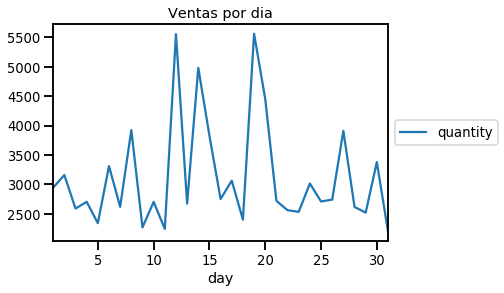

In [36]:
sns.set_context("talk", font_scale=0.8)
tp_by_day[('quantity')].plot(title = "Ventas por dia" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

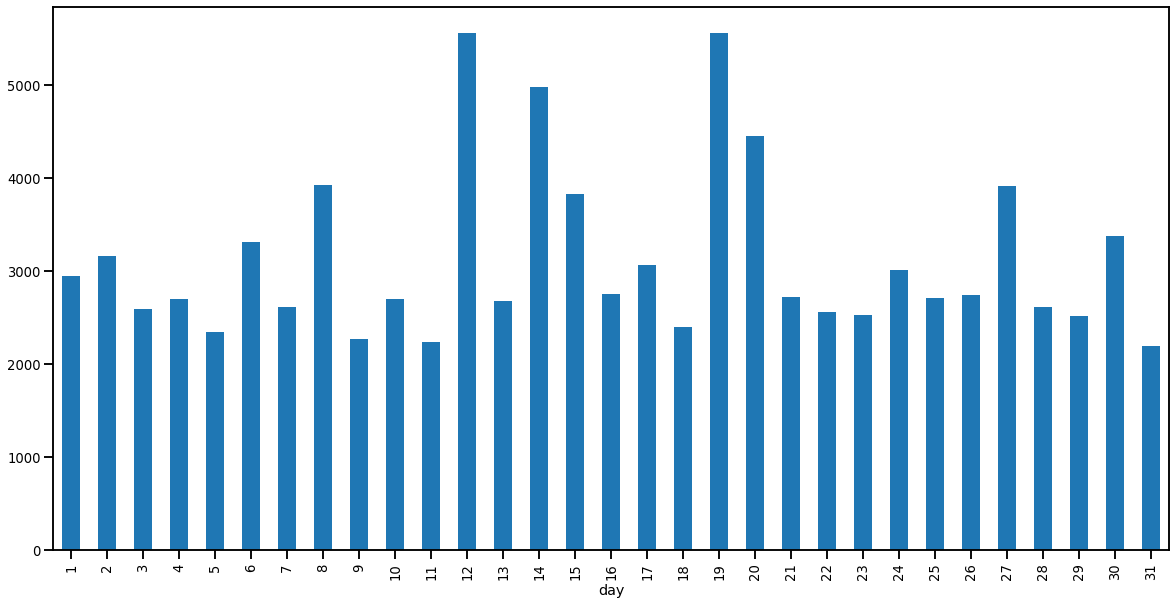

In [37]:
tp_by_day.quantity.plot.bar(figsize=(20,10))

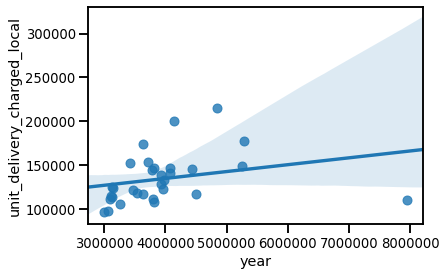

In [38]:
##VER QUE PODEMOS COMPARAR CON ESTE GRAFICO, el area sale price, deberia cambiarse x otra cosa (MARCA VS QUANTITY)
##sns.lmplot(x="KitchenQual", y="SalePrice", data=df_train)
area_sale_price = tp_by_day[['year', 'unit_delivery_charged_local']]
area_sale_price.corr()
sns.regplot(x='year', y='unit_delivery_charged_local', data= area_sale_price);

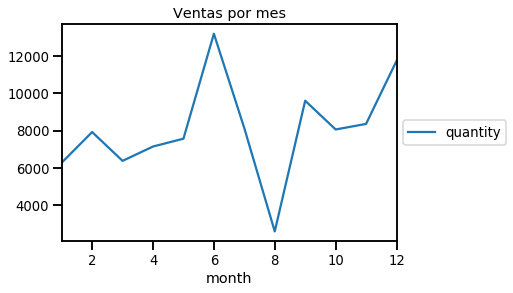

In [39]:
sns.set_context("talk", font_scale=0.8)
tp_by_month[('quantity')].plot(title = "Ventas por mes" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

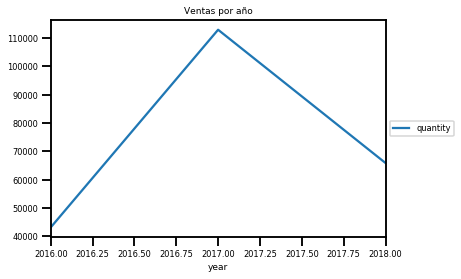

In [40]:
sns.set_context("talk", font_scale=0.5)
tp_by_year[('quantity')].plot(title = "Ventas por año" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#este quedó medio falopa, pero nos permite ver que el 2017 tiene mas cantidad. Asumimos que es porque
#hay más registros (están los de todo el año) y porque deben haber empezado a cargar más data en 2017.

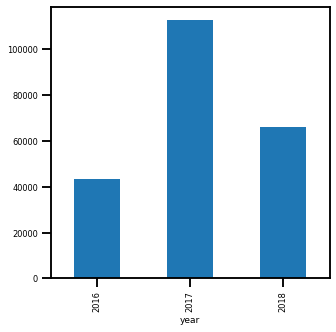

In [41]:
tp_by_year.quantity.plot.bar(figsize=(5,5))

In [42]:
#La idea ahora es ver si hay estacionalidad en algún mes con respecto a una marca (elegí las mas importantes)
#Primero filtramos por marca
tp_corona = tp_h.loc[tp_h['brand'] == 'Corona']
tp_importada = tp_h.loc[tp_h['brand'] == 'importada']
tp_Stella = tp_h.loc[tp_h['brand'] == 'Stella Artois']
tp_Patagonia = tp_h.loc[tp_h['brand'] == 'Patagonia Brewing Co.']
tp_BevyBar = tp_h.loc[tp_h['brand'] == 'BevyBar']

In [43]:
#No recuerdo si hacer este paso es necesario o no, lo dejo por las dudas.
tp_corona.groupby(['month'])['quantity'].sum()
tp_importada.groupby(['month'])['quantity'].sum()
tp_Stella.groupby(['month'])['quantity'].sum()
tp_Patagonia.groupby(['month'])['quantity'].sum()
tp_BevyBar.groupby(['month'])['quantity'].sum()

month
1      255
2      241
3      288
4      465
5     1876
6      802
7      732
8      126
9      161
10    1608
11    1531
12    1572
Name: quantity, dtype: int64

In [44]:
#Segundo agrupamos por mes y sumamos. Acá estaría creando varios datasets, tal vez no es necesario.
tp_BevyBar_month = tp_BevyBar.groupby(['month']).sum()
tp_Patagonia_month = tp_Patagonia.groupby(['month']).sum()
tp_importada_month = tp_importada.groupby(['month']).sum()
tp_Stella_month = tp_Stella.groupby(['month']).sum()
tp_Corona_month = tp_corona.groupby(['month']).sum()

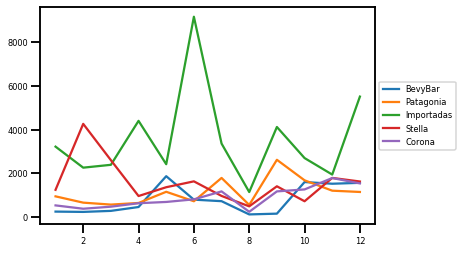

In [45]:
#visualizamos la variación por mes de cada una. Con barras tal vez quede mas lindo.
sns.set_context("talk", font_scale=0.5)
plt.plot(tp_BevyBar_month['quantity'], label='BevyBar')
plt.plot(tp_Patagonia_month['quantity'], label='Patagonia')
plt.plot(tp_importada_month['quantity'], label='Importadas')
plt.plot(tp_Stella_month['quantity'], label='Stella')
plt.plot(tp_Corona_month['quantity'], label='Corona')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#deberíamos hacer lo mismo pero 1 para cada año.

In [46]:
#Sale ese filtrado por categoría. Hago lo mismo que para Brand pero ahora con category.
tp_beer = tp_h.loc[tp_h['category'] == 'Beer']
np.shape(tp_beer)

(22080, 19)

In [47]:
tp_pack = tp_h.loc[tp_h['category'] == 'Mixed Pack']
np.shape(tp_pack)

(31790, 19)

In [48]:
tp_Merchandise = tp_h.loc[tp_h['category'] == 'Merchandise']
np.shape(tp_Merchandise)

(6430, 19)

In [49]:
tp_beer_month = tp_beer.groupby(['month']).sum()
tp_Merchandise_month = tp_Merchandise.groupby(['month']).sum()
tp_pack_month = tp_pack.groupby(['month']).sum()

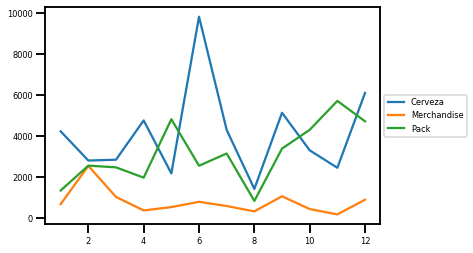

In [50]:
#visualizamos la variación por mes de cada una. Con barras tal vez quede mas lindo.
sns.set_context("talk", font_scale=0.5)
plt.plot(tp_beer_month['quantity'], label='Cerveza')
plt.plot(tp_Merchandise_month['quantity'], label='Merchandise')
plt.plot(tp_pack_month['quantity'], label='Pack')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#Nuevamente, habría que hacer lo mismo pero para cada año (un plot para 2016, otro 2017 y otro 2018)

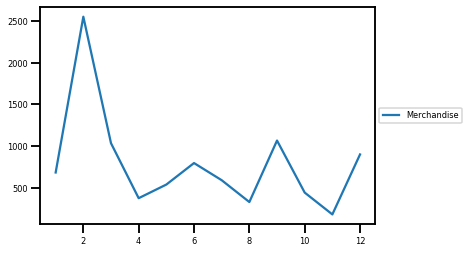

In [51]:
#Analizo Merchandise por separado
plt.plot(tp_Merchandise_month['quantity'], label='Merchandise')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [52]:
#Acá la idea es mostrar en qué meses se gasta más (y ver si hay relación con la quantity)
tp_by_month['unit_net_revenue_local']

month
1     1.037117e+06
2     2.329922e+06
3     2.031993e+06
4     1.880463e+06
5     3.561085e+06
6     2.476655e+06
7     2.579307e+06
8     6.848248e+05
9     2.778384e+06
10    3.732834e+06
11    5.258182e+06
12    4.803790e+06
Name: unit_net_revenue_local, dtype: float64

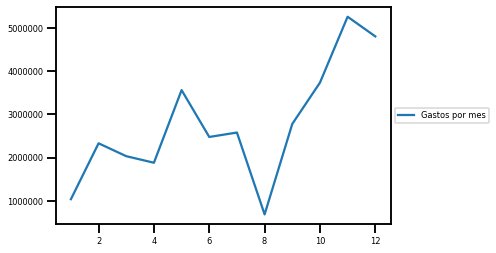

In [53]:
plt.plot(tp_by_month['unit_net_revenue_local'], label='Gastos por mes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [54]:
tp_by_brand = tp_h.groupby(['brand']).sum()

In [55]:
tp_by_brand

,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,year,month,day
brand,,,,,,,,
BevyBar,1.028572e+07,8960878.0,7.960914e+05,9657,7.793511e+06,17509577,69275,140045
Cervecería y Maltería Quilmes,2.445637e+05,196566.0,2.668917e+04,885,1.861725e+05,1476444,6642,12827
Corona,7.770404e+06,5898696.0,7.936230e+05,10771,5.885336e+06,14022184,58683,127850
Patagonia Brewing Co.,7.084487e+06,5422552.0,8.177845e+05,13773,5.396261e+06,19929977,75213,159328
Stella Artois,1.050098e+07,7290455.0,1.104318e+06,19155,7.970120e+06,25952739,75462,195390
importada,7.775587e+06,5906052.0,6.354971e+05,42731,5.923156e+06,42992355,151535,346028


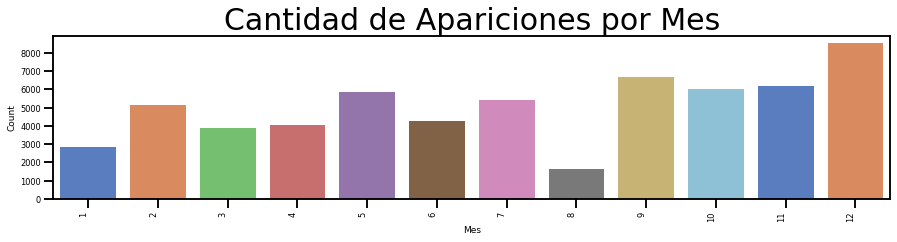

In [56]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="month", data=tp_h, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de Apariciones por Mes',size = 30)
plt.xlabel("Mes")
plt.ylabel("Count")
plt.show()

In [57]:
##Usar solo 2017?
#Ver correlacion entre compradores recurrentes y algun producto en particular
#Clusterizar los que generan compras recurrentes

In [58]:
#Borrar budweiser
#Usar solo 2017
#Juntar Bevybar y craftsociety
#Usar mas boxplot
#1° Definir 2017, las features finales finales
#2a-Regresion de 2017, predecir y comparar con enero 2018
#2-Clustering: armar el clustering y hacer un eda de los clusters
#2b
#Regresion, lineas de tiempo, etc --> Ver si podemos aplicarlo y ver si alguna marca esta creciendo, o no


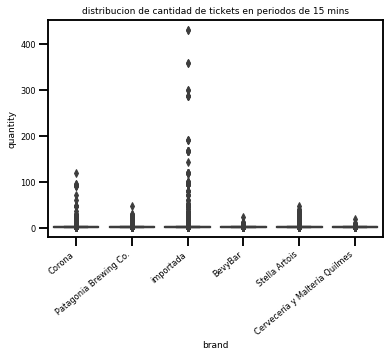

In [60]:
ay = sns.boxplot(x = tp_arg_2017.brand, y = tp_arg_2017.quantity, data = tp_arg_2017)
ay.set_xticklabels(ay.get_xticklabels(), rotation=40, ha="right")
plt.title("distribucion de cantidad de tickets en periodos de 15 mins")
plt.show()

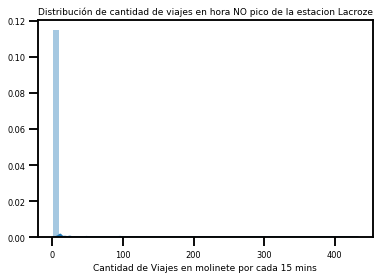

In [62]:
sns.distplot((tp_arg_2017['quantity']))
plt.title('Distribución de cantidad de viajes en hora NO pico de la estacion Lacroze')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()

In [ ]:
tp_arg_2017.head()